In [1]:
import glob
import pathlib
import os
import sys
import pandas as pd
result_folders = ['/logo2/irfan/Pradeep_irfan_project/Griffin/Griffin/Run_Prostate_Bam/griffin_nucleosome_profiling/results_TFBS','/logo2/irfan/Pradeep_irfan_project/Griffin/Griffin/Run_Prostate_Bam_otherRUN/griffin_nucleosome_profiling/results','/logo2/irfan/Pradeep_irfan_project/Griffin/Griffin/Run_Prostate_bam_rest/griffin_nucleosome_profiling/results_TFBS','/logo2/irfan/Pradeep_irfan_project/Griffin/Griffin/Run_healthy/griffin_nucleosome_profiling/results']


In [2]:
GC_uncorrected_results = []
GC_corrected_results = []
for result in result_folders:
    subdirs = os.listdir(result)
    for subdir in subdirs:
        if subdir!='plots':
            bam_results = os.listdir(result+'/'+subdir)
            for bam_result in bam_results:
                temp = pd.read_csv(result+'/'+subdir+'/'+bam_result, sep = '\t')
                samples =  temp['sample'].tolist()
                
                if len(set(samples))!=1:
                    print(f'multiple samples   {temp}')
                    sys.exit(1)
                sample_name = samples[0]
                temp = temp[['site_name','central_coverage']]
                temp.rename(columns={'central_coverage':sample_name},inplace=True)
                temp['site_name'] = temp['site_name'].str.replace('_10000','') 
                temp.set_index('site_name',inplace = True)
                if 'uncorrected' in bam_result:
                    GC_uncorrected_results.append(temp)
                elif 'GC_corrected' in bam_result:
                    GC_corrected_results.append(temp)
                else:
                    print('ERROR')
                    sys.exit(1)
                
                    
                    


In [3]:
GC_corrected_df = pd.concat(GC_corrected_results,axis = 1)
print(GC_corrected_df.shape)
GC_corrected_df.head()

(377, 60)


,TU_B_0916-auto.final.bam,TU_N_1816-auto.final.bam,TU_B_7491-auto.final.bam,TU_B_7916-auto.final.bam,TU_B_4587-auto.final.bam,TU_B_4643-auto.final.bam,TU_C_2412-auto.final.bam,TU_P_9739-auto.final.bam,TU_B_5389-auto.final.bam,TU_K_1928-auto.final.bam,...,Nu58-auto.final.bam,Nu41-auto.final.bam,Nu5-auto.final.bam,Nu20-auto.final.bam,Nu63-auto.final.bam,Nu65-auto.final.bam,Nu13-auto.final.bam,Nu4-auto.final.bam,Nu62-auto.final.bam,Nu45-auto.final.bam
site_name,,,,,,,,,,,,,,,,,,,,,
POU3F2,0.99019,0.92069,0.90131,0.94006,1.23861,0.91563,0.88555,0.93376,0.92577,0.94380,...,0.90140,0.90028,0.92062,0.93318,0.90296,0.90653,0.89217,0.90914,0.89841,0.93894
TBP,0.74048,0.62057,0.50591,0.64907,0.69001,0.56235,0.58000,0.62750,0.64653,0.65716,...,0.62764,0.61111,0.63085,0.66956,0.63294,0.62844,0.60287,0.59713,0.60324,0.65030
ERF,0.88279,0.91318,0.73094,0.92387,1.00627,0.88065,0.86330,0.90165,0.91203,0.90124,...,0.90996,0.91124,0.90002,0.91679,0.91033,0.90613,0.88537,0.89675,0.89492,0.92015
TWIST1,1.02496,1.00211,0.98495,1.01304,1.06820,0.97374,0.98902,1.00436,1.01337,1.01307,...,0.99204,0.99549,1.00201,1.01433,0.99621,1.01082,0.97929,0.99944,0.99491,1.00684
SOX13,1.01348,0.99346,0.95661,1.00656,1.12529,0.95942,0.96938,0.98706,0.98900,1.00539,...,0.96195,0.97195,0.97186,0.94833,0.96860,0.98455,0.96015,0.94314,0.96553,0.98245


In [4]:
GC_uncorrected_df = pd.concat(GC_uncorrected_results,axis = 1)
print(GC_uncorrected_df.shape)
GC_uncorrected_df.head()

(377, 60)


,TU_B_0916-auto.final.bam,TU_N_1816-auto.final.bam,TU_B_7491-auto.final.bam,TU_B_7916-auto.final.bam,TU_B_4587-auto.final.bam,TU_B_4643-auto.final.bam,TU_C_2412-auto.final.bam,TU_P_9739-auto.final.bam,TU_B_5389-auto.final.bam,TU_K_1928-auto.final.bam,...,Nu58-auto.final.bam,Nu41-auto.final.bam,Nu5-auto.final.bam,Nu20-auto.final.bam,Nu63-auto.final.bam,Nu65-auto.final.bam,Nu13-auto.final.bam,Nu4-auto.final.bam,Nu62-auto.final.bam,Nu45-auto.final.bam
site_name,,,,,,,,,,,,,,,,,,,,,
POU3F2,0.93747,1.07626,0.90268,1.06539,1.88961,1.00845,0.95736,1.00897,0.94524,1.06396,...,0.89858,0.97981,0.99091,0.95566,0.94152,0.92048,0.98696,0.97355,0.93830,0.96048
TBP,0.63087,0.62030,0.45954,0.60864,0.83247,0.55035,0.55249,0.59655,0.60685,0.67497,...,0.58228,0.59491,0.61415,0.62155,0.60684,0.59764,0.60954,0.56982,0.57614,0.61392
ERF,0.84718,0.88465,0.69974,0.89273,0.96957,0.85036,0.83444,0.87814,0.88972,0.89178,...,0.88225,0.88189,0.87957,0.88822,0.88450,0.88333,0.86605,0.86824,0.86858,0.89380
TWIST1,1.03115,1.07133,0.98086,1.09581,1.21618,1.00505,1.02676,1.05229,1.03138,1.06414,...,0.99500,1.02615,1.03512,1.03142,1.00991,1.01393,1.01212,1.03252,1.00755,1.01753
SOX13,1.01237,1.06084,0.95193,1.08798,1.25749,0.99041,1.00648,1.03053,1.00450,1.05480,...,0.96624,1.00252,1.00337,0.96455,0.98281,0.98861,0.99228,0.97480,0.97872,0.99367


In [5]:
GC_corrected_df=GC_corrected_df.loc[:,~GC_corrected_df.columns.duplicated()]
print(GC_corrected_df.shape)
GC_corrected_df.head()

(377, 59)


,TU_B_0916-auto.final.bam,TU_N_1816-auto.final.bam,TU_B_7491-auto.final.bam,TU_B_7916-auto.final.bam,TU_B_4587-auto.final.bam,TU_B_4643-auto.final.bam,TU_C_2412-auto.final.bam,TU_P_9739-auto.final.bam,TU_B_5389-auto.final.bam,TU_K_1928-auto.final.bam,...,Nu58-auto.final.bam,Nu41-auto.final.bam,Nu5-auto.final.bam,Nu20-auto.final.bam,Nu63-auto.final.bam,Nu65-auto.final.bam,Nu13-auto.final.bam,Nu4-auto.final.bam,Nu62-auto.final.bam,Nu45-auto.final.bam
site_name,,,,,,,,,,,,,,,,,,,,,
POU3F2,0.99019,0.92069,0.90131,0.94006,1.23861,0.91563,0.88555,0.93376,0.92577,0.94380,...,0.90140,0.90028,0.92062,0.93318,0.90296,0.90653,0.89217,0.90914,0.89841,0.93894
TBP,0.74048,0.62057,0.50591,0.64907,0.69001,0.56235,0.58000,0.62750,0.64653,0.65716,...,0.62764,0.61111,0.63085,0.66956,0.63294,0.62844,0.60287,0.59713,0.60324,0.65030
ERF,0.88279,0.91318,0.73094,0.92387,1.00627,0.88065,0.86330,0.90165,0.91203,0.90124,...,0.90996,0.91124,0.90002,0.91679,0.91033,0.90613,0.88537,0.89675,0.89492,0.92015
TWIST1,1.02496,1.00211,0.98495,1.01304,1.06820,0.97374,0.98902,1.00436,1.01337,1.01307,...,0.99204,0.99549,1.00201,1.01433,0.99621,1.01082,0.97929,0.99944,0.99491,1.00684
SOX13,1.01348,0.99346,0.95661,1.00656,1.12529,0.95942,0.96938,0.98706,0.98900,1.00539,...,0.96195,0.97195,0.97186,0.94833,0.96860,0.98455,0.96015,0.94314,0.96553,0.98245


In [6]:
GC_corrected_df.loc['TBP']

TU_B_0916-auto.final.bam     0.74048
TU_N_1816-auto.final.bam     0.62057
TU_B_7491-auto.final.bam     0.50591
TU_B_7916-auto.final.bam     0.64907
TU_B_4587-auto.final.bam     0.69001
TU_B_4643-auto.final.bam     0.56235
TU_C_2412-auto.final.bam     0.58000
TU_P_9739-auto.final.bam     0.62750
TU_B_5389-auto.final.bam     0.64653
TU_K_1928-auto.final.bam     0.65716
TU_R_8354-auto.final.bam     0.61594
TU_L_9845-auto.final.bam     0.63941
TU_W_7907-auto.final.bam     0.66475
TU_S_3258-auto.final.bam     0.61567
TU_D_0690-auto.final.bam     0.67008
TU_S_6158-auto.final.bam     0.75230
TU_G_4951-auto.final.bam     0.62313
TU_G_0292-auto.final.bam     0.66833
TU_T_7242-auto.final.bam     0.54477
TU_H_1887-auto.final.bam     0.59195
TU_T_1370-auto.final.bam     0.61320
TU_C_0554-auto.final.bam     0.62561
TU_M_8516-auto.final.bam     0.78304
TU_C_1142-auto.final.bam     0.61488
TU_M_0861-auto.final.bam     0.60682
TU_D_3730-auto.final.bam     0.63175
TU_G_2634-auto.final.bam     0.58799
T

<h1>Statistical Analysis</h1>

**Group into low and high risk**

In [7]:
low_high_file = 'Irfan prostate sheet 111222.xlsx' #'Irfan prostate sheet 111222.xlsx' #'Irfan_analysis CN SNV data_011123_irf.xlsx'#'Irfan prostate sheet 111222.xlsx'
sheet_name = 'methylation high rsk vs low rsk' #'Grant analysis ARlocus + EM-Seq' #'methylation high rsk vs low rsk'
annotation_column = 'AR Locus  (1= high risk, 0= low risk)' #'Prog_12month (1= Progression, 0 =No progression)' #'AR Locus  (1= high risk, 0= low risk)'
low_high_df = pd.read_excel(low_high_file,sheet_name = sheet_name)
low_high_df.head()

,Unnamed: 0,ID,"AR Locus (1= high risk, 0= low risk)","AR (1= high risk, 0= low risk)","ARENHCR (1= high risk, 0= low risk)","DDR Genes (1= high risk, 0= low risk)","PTEN alterations (1= high risk, 0= low risk)","PTEN-PIK3 pathway (1= high risk, 0= low risk)","PI3K pathway only (1= high risk, 0= low risk)","AR + PTEN (1= high risk, 0= low risk)"
0,1,TU-W-4293,0,0,0,0,1,1,0,1
1,2,TU-K-1928,1,1,0,0,0,1,1,1
2,3,TU-P-9739,1,0,1,0,1,1,0,1
3,4,TU-C-2412,1,1,1,1,0,0,0,1
4,5,TU-B-5389,0,0,0,0,0,0,0,0


In [8]:
low_high_df['samples'] = low_high_df['ID'].str.replace('-','_') 
low_high_df['samples'] = low_high_df['samples']+'-auto.final.bam'
print(low_high_df.columns)
low_high_df.head()

Index(['Unnamed: 0', 'ID', 'AR Locus  (1= high risk, 0= low risk)',
       'AR  (1= high risk, 0= low risk)',
       'ARENHCR  (1= high risk, 0= low risk)',
       'DDR Genes (1= high risk, 0= low risk)',
       'PTEN alterations  (1= high risk, 0= low risk)',
       'PTEN-PIK3 pathway  (1= high risk, 0= low risk)',
       'PI3K pathway only  (1= high risk, 0= low risk)',
       'AR + PTEN  (1= high risk, 0= low risk)', 'samples'],
      dtype='object')


,Unnamed: 0,ID,"AR Locus (1= high risk, 0= low risk)","AR (1= high risk, 0= low risk)","ARENHCR (1= high risk, 0= low risk)","DDR Genes (1= high risk, 0= low risk)","PTEN alterations (1= high risk, 0= low risk)","PTEN-PIK3 pathway (1= high risk, 0= low risk)","PI3K pathway only (1= high risk, 0= low risk)","AR + PTEN (1= high risk, 0= low risk)",samples
0,1,TU-W-4293,0,0,0,0,1,1,0,1,TU_W_4293-auto.final.bam
1,2,TU-K-1928,1,1,0,0,0,1,1,1,TU_K_1928-auto.final.bam
2,3,TU-P-9739,1,0,1,0,1,1,0,1,TU_P_9739-auto.final.bam
3,4,TU-C-2412,1,1,1,1,0,0,0,1,TU_C_2412-auto.final.bam
4,5,TU-B-5389,0,0,0,0,0,0,0,0,TU_B_5389-auto.final.bam


In [9]:
low_high_mapping = {}
#print(low_high_df.columns)
for index, row in low_high_df.iterrows():
   
    if row[annotation_column] == 0:
        low_high_mapping[row['samples']]='low_risk'
    elif row[annotation_column] == 1:
        low_high_mapping[row['samples']]='high_risk'
    else:
        print(row)
        print('ERROR')
        sys.exit(1)

In [10]:
all_samples = GC_corrected_df.columns.tolist()
healthy = [x for x in all_samples if x.startswith('Nu')]
print(len(healthy))
healthy

15


['Nu64-auto.final.bam',
 'Nu67-auto.final.bam',
 'Nu66_-auto.final.bam',
 'Nu68-auto.final.bam',
 'Nu24-auto.final.bam',
 'Nu58-auto.final.bam',
 'Nu41-auto.final.bam',
 'Nu5-auto.final.bam',
 'Nu20-auto.final.bam',
 'Nu63-auto.final.bam',
 'Nu65-auto.final.bam',
 'Nu13-auto.final.bam',
 'Nu4-auto.final.bam',
 'Nu62-auto.final.bam',
 'Nu45-auto.final.bam']

In [11]:
TF_file = 'TF108.xlsx' #TF_toy.xlsx
TF_list = pd.read_excel(TF_file,header = None)
TF_list = TF_list[0].tolist()
#TF_list

In [12]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from collections import Counter
def MWU_test(df):
    df_mapped = (df.rename(columns=low_high_mapping)).loc[TF_list]
    print(df_mapped.shape)
    print(df_mapped.head())
    frequency = Counter(df_mapped.columns)
    high_values = df_mapped['high_risk'].values.ravel().tolist()
    low_values = df_mapped['low_risk'].values.ravel().tolist()
    
    plt.boxplot([high_values, low_values], labels=['high_risk (n='+str(frequency['high_risk'])+')', 'low_risk (n='+str(frequency['low_risk'])+')'])
    U1, p = mannwhitneyu(high_values, low_values,alternative='two-sided')

    plt.text(1.05, min(min(high_values),min(low_values))-0.25, 'p-value = {:.6f}'.format(p), fontsize=12)
    print(p)
    # set plot title and axis labels
    plt.title('Mann-Whitney U Test')
    plt.xlabel('Group')
    plt.ylabel('Coverage')

    # show plot
    plt.show()


In [13]:
def reverse_dict(A):
    B = {}
    for key, value in A.items():
        if value not in B:
            B[value] = []
        B[value].append(key)
    return B
low_high_mapping_reversed = reverse_dict(low_high_mapping)
low_high_mapping_reversed

{'low_risk': ['TU_W_4293-auto.final.bam',
  'TU_B_5389-auto.final.bam',
  'TU_B_4587-auto.final.bam',
  'TU_B_4643-auto.final.bam',
  'TU_D_8370-auto.final.bam',
  'TU_G_4951-auto.final.bam',
  'TU_M_5024-auto.final.bam',
  'TU_C_1142-auto.final.bam',
  'TU_L_9845-auto.final.bam',
  'TU_S_3258-auto.final.bam',
  'TU_B_4713-auto.final.bam',
  'TU_R_8354-auto.final.bam',
  'TU_B_9144-auto.final.bam',
  'TU_C_0554-auto.final.bam',
  'TU_G_2634-auto.final.bam',
  'TU_R_6659-auto.final.bam',
  'TU_M_0861-auto.final.bam',
  'TU_S_3165-auto.final.bam',
  'TU_H_0468-auto.final.bam',
  'TU_G_4555-auto.final.bam',
  'TU_N_9026-auto.final.bam',
  'TU_K_1464-auto.final.bam',
  'TU_S_4467-auto.final.bam',
  'TU_B_7916-auto.final.bam',
  'TU_N_1816-auto.final.bam'],
 'high_risk': ['TU_K_1928-auto.final.bam',
  'TU_P_9739-auto.final.bam',
  'TU_C_2412-auto.final.bam',
  'TU_T_7242-auto.final.bam',
  'TU_E_1334-auto.final.bam',
  'TU_B_0916-auto.final.bam',
  'TU_D_0690-auto.final.bam',
  'TU_M_8516-a

In [14]:
low_high_mapping_reversed['healthy'] = healthy

low_high_mapping_reversed

{'low_risk': ['TU_W_4293-auto.final.bam',
  'TU_B_5389-auto.final.bam',
  'TU_B_4587-auto.final.bam',
  'TU_B_4643-auto.final.bam',
  'TU_D_8370-auto.final.bam',
  'TU_G_4951-auto.final.bam',
  'TU_M_5024-auto.final.bam',
  'TU_C_1142-auto.final.bam',
  'TU_L_9845-auto.final.bam',
  'TU_S_3258-auto.final.bam',
  'TU_B_4713-auto.final.bam',
  'TU_R_8354-auto.final.bam',
  'TU_B_9144-auto.final.bam',
  'TU_C_0554-auto.final.bam',
  'TU_G_2634-auto.final.bam',
  'TU_R_6659-auto.final.bam',
  'TU_M_0861-auto.final.bam',
  'TU_S_3165-auto.final.bam',
  'TU_H_0468-auto.final.bam',
  'TU_G_4555-auto.final.bam',
  'TU_N_9026-auto.final.bam',
  'TU_K_1464-auto.final.bam',
  'TU_S_4467-auto.final.bam',
  'TU_B_7916-auto.final.bam',
  'TU_N_1816-auto.final.bam'],
 'high_risk': ['TU_K_1928-auto.final.bam',
  'TU_P_9739-auto.final.bam',
  'TU_C_2412-auto.final.bam',
  'TU_T_7242-auto.final.bam',
  'TU_E_1334-auto.final.bam',
  'TU_B_0916-auto.final.bam',
  'TU_D_0690-auto.final.bam',
  'TU_M_8516-a

In [15]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

def stat_test(df,low_cols,high_cols):
    p_values = []
    low_mean = []
    high_mean = []
    df=df.copy()
    df=df[low_cols+high_cols]
    for index, row in df.iterrows():
   
        low_group = row.filter(items=low_cols)
        high_group = row.filter(items=high_cols)
        U1, p = mannwhitneyu(high_group, low_group,alternative='two-sided')
        #t, p = ttest_ind(low_group, high_group)
        low_mean.append(low_group.mean())
        high_mean.append(high_group.mean())
        p_values.append(p)
    reject, q_values, _, _ = multipletests(p_values, method='fdr_bh')

    df['lowRisk'] = low_mean
    df['highRisk'] = high_mean
    df['lowRisk-highRisk'] = df['lowRisk']-df['highRisk']
    df['log2(lowRisk/highRisk)'] = np.log2(df['lowRisk'] / df['highRisk'])

    df['p-value'] = p_values
    df['q-value'] = q_values
    df['-log(p-value)'] = - np.log10(df['p-value'])
    df['-log(q-value)'] = - np.log10(df['q-value'])
    return df
    

def find_best_TF(df):
    low_cols = list(set(low_high_mapping_reversed['low_risk']).intersection(df.columns))
    high_cols = list(set(low_high_mapping_reversed['high_risk']).intersection(df.columns))
    
    healthy_cols = list(set(low_high_mapping_reversed['healthy']).intersection(df.columns))
    
    healthy_highRisk =  stat_test(df,healthy_cols,high_cols)
    low_high_risk =  stat_test(df,low_cols,high_cols)
    healthy_lowRisk =  stat_test(df,healthy_cols,low_cols)
    return healthy_highRisk, low_high_risk, healthy_lowRisk
    





stat_df,low_high_risk, healthy_lowRisk= find_best_TF(GC_corrected_df)

In [16]:
def generate_volcano_plot(df, neg_log_q_value_col, log2fold_change_col, q_threshold=0.05, fc_threshold=0):
    

    # Subset significant and non-significant changes
    sig_changes = df[(df[neg_log_q_value_col] > -1 * np.log10(q_threshold)) & (abs(df[log2fold_change_col]) >= fc_threshold)]
    non_sig_changes = df[(df[neg_log_q_value_col] <= -1 * np.log10(q_threshold)) | (abs(df[log2fold_change_col]) < fc_threshold)]

    # Plot significant and non-significant changes
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(non_sig_changes[log2fold_change_col], non_sig_changes[neg_log_q_value_col], c='grey', alpha=0.5)
    ax.scatter(sig_changes[log2fold_change_col], sig_changes[neg_log_q_value_col], c='red', alpha=0.5)

    # Add labels and title
    ax.set_xlabel(log2fold_change_col)
    ax.set_ylabel(neg_log_q_value_col)
    ax.set_title('Volcano Plot')

    # Add horizontal line for significance threshold
    ax.axhline(y=-1 * np.log10(q_threshold), color='black', linestyle='--')
    for i, row in sig_changes.iterrows():
        ax.annotate(i, (row[log2fold_change_col], row[neg_log_q_value_col]), ha='center', va='center', fontsize=10)

    # Show plot
    plt.show()

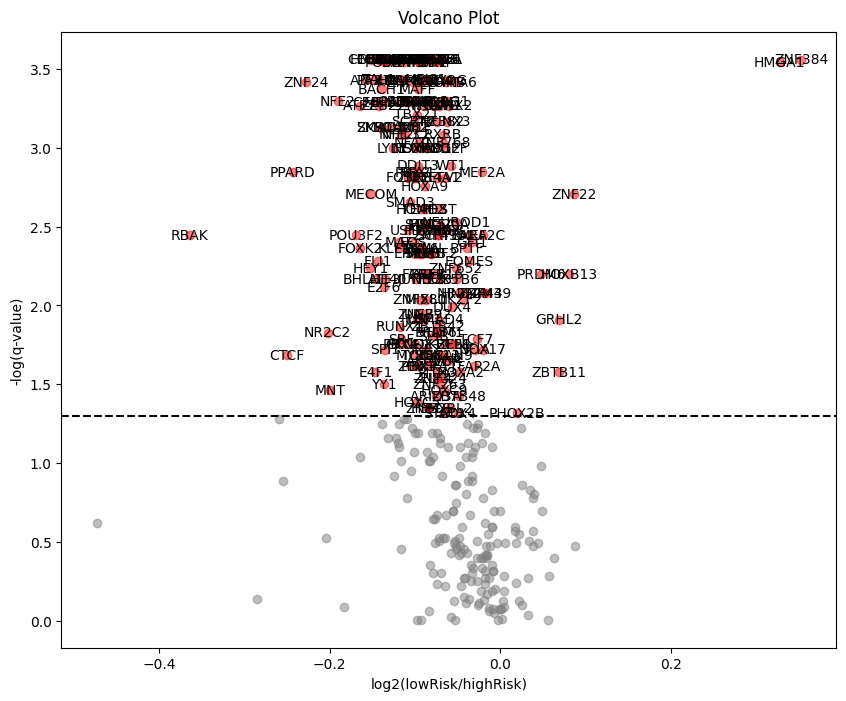

In [17]:
generate_volcano_plot(stat_df,'-log(q-value)','log2(lowRisk/highRisk)')

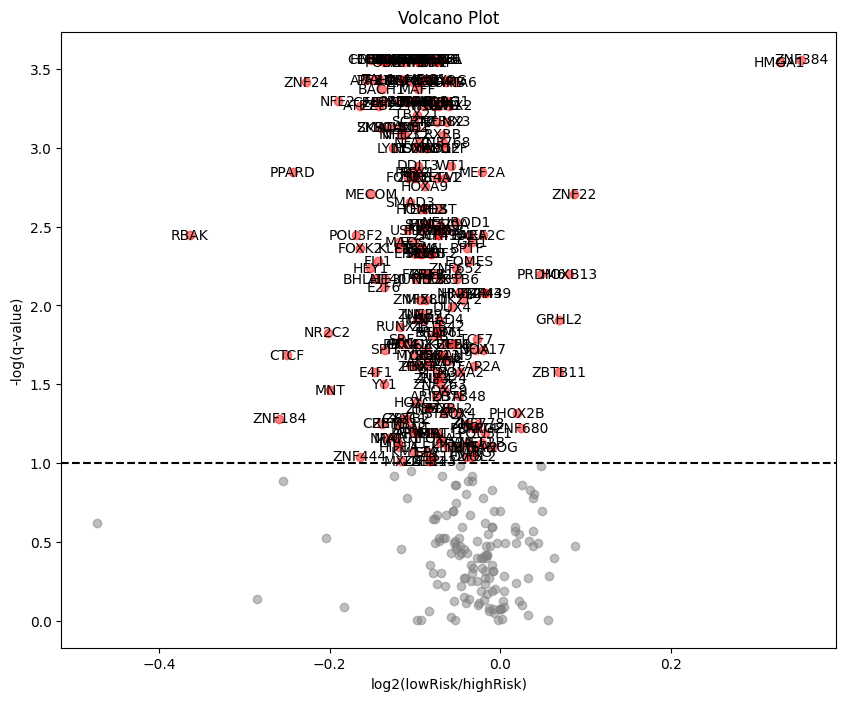

In [18]:
generate_volcano_plot(stat_df,'-log(q-value)','log2(lowRisk/highRisk)',q_threshold=0.1)

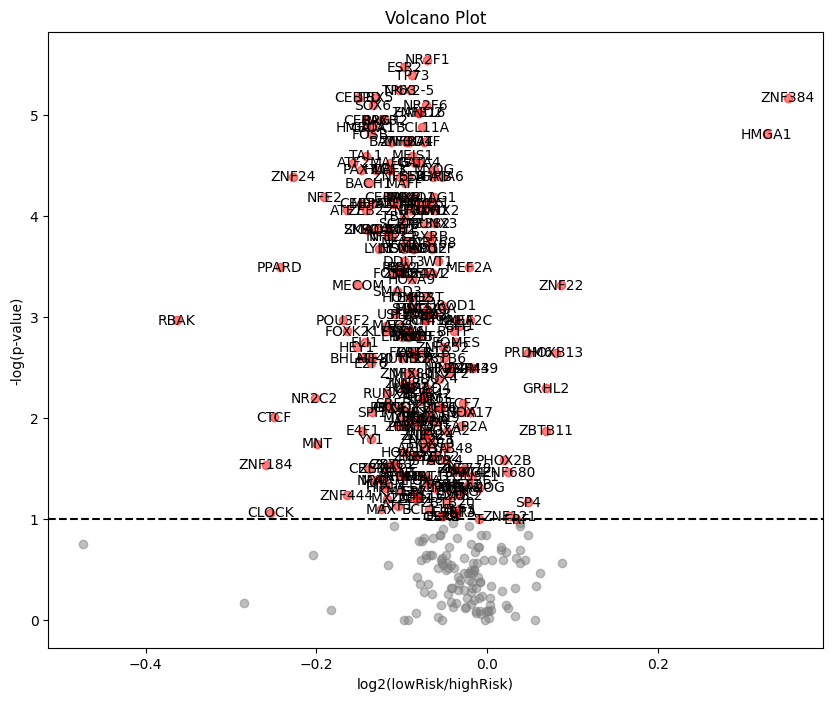

In [19]:
generate_volcano_plot(stat_df,'-log(p-value)','log2(lowRisk/highRisk)', q_threshold=0.1)

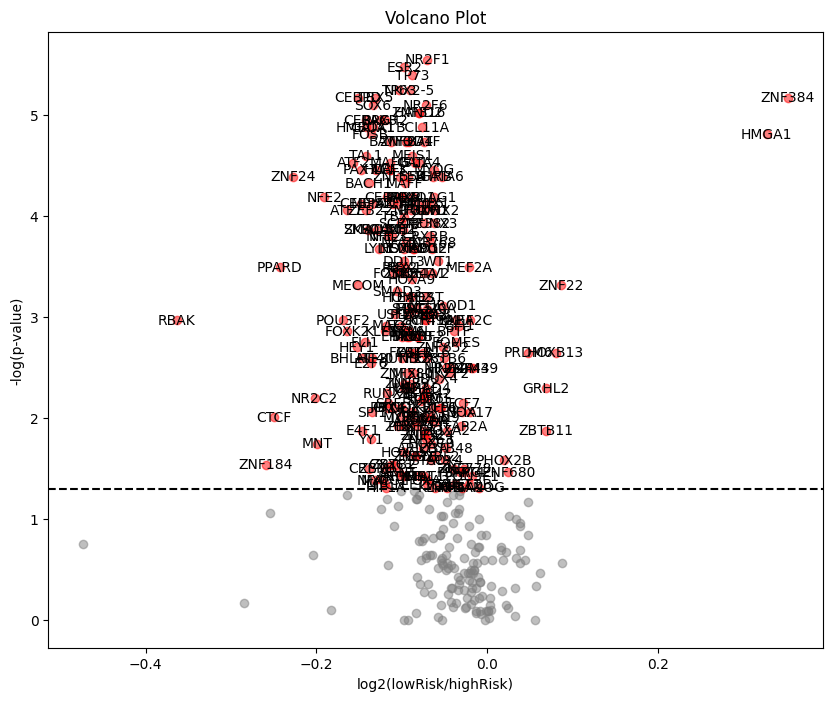

In [20]:
generate_volcano_plot(stat_df,'-log(p-value)','log2(lowRisk/highRisk)')

In [21]:
filename = os.path.splitext(low_high_file)[0].strip()+"_Griffin_analyses.xlsx"
writer = pd.ExcelWriter(filename, engine='xlsxwriter')

#hardcoded
stat_df.to_excel(writer,sheet_name='healthy_vs_highRisk')
low_high_risk.to_excel(writer,sheet_name='lowrisk_vs_highRisk')
healthy_lowRisk.to_excel(writer,sheet_name='healthy_vs_lowrisk')

writer.close()

In [22]:
low_high_risk.head()

,TU_C_0554-auto.final.bam,TU_G_4555-auto.final.bam,TU_G_4951-auto.final.bam,TU_L_9845-auto.final.bam,TU_R_6659-auto.final.bam,TU_N_9026-auto.final.bam,TU_B_7916-auto.final.bam,TU_H_0468-auto.final.bam,TU_M_0861-auto.final.bam,TU_M_5024-auto.final.bam,...,TU_S_6158-auto.final.bam,TU_B1_9846-auto.final.bam,lowRisk,highRisk,lowRisk-highRisk,log2(lowRisk/highRisk),p-value,q-value,-log(p-value),-log(q-value)
site_name,,,,,,,,,,,,,,,,,,,,,
POU3F2,0.92668,0.92765,0.88633,0.93021,0.94437,1.03462,0.94006,0.90161,0.89809,1.03582,...,1.49372,0.94383,0.958577,1.027918,-0.069341,-0.100759,0.050329,0.169412,1.298179,0.771056
TBP,0.62561,0.63022,0.62313,0.63941,0.63896,0.88159,0.64907,0.60060,0.60682,0.67475,...,0.75230,0.62999,0.638394,0.650256,-0.011862,-0.026561,0.273291,0.423995,0.563374,0.372639
ERF,0.91342,0.89873,0.89232,0.91344,0.90741,0.99915,0.92387,0.89917,0.88580,0.99107,...,0.88718,0.85973,0.911431,0.884264,0.027167,0.043657,0.123891,0.266897,0.906959,0.573656
TWIST1,1.01318,0.99318,0.99010,1.01269,1.00074,1.00670,1.01304,0.99552,0.98305,1.07603,...,1.10400,0.98055,1.008776,1.022815,-0.014039,-0.019940,0.252312,0.410008,0.598061,0.387208
SOX13,0.99953,0.97205,0.96539,0.97863,0.99953,1.01083,1.00656,0.98912,0.98121,1.09186,...,1.17336,0.97494,0.998968,1.018677,-0.019709,-0.028187,0.648781,0.759598,0.187902,0.119416


In [23]:
low_high_risk.loc['POU3F2']

TU_C_0554-auto.final.bam     0.926680
TU_G_4555-auto.final.bam     0.927650
TU_G_4951-auto.final.bam     0.886330
TU_L_9845-auto.final.bam     0.930210
TU_R_6659-auto.final.bam     0.944370
TU_N_9026-auto.final.bam     1.034620
TU_B_7916-auto.final.bam     0.940060
TU_H_0468-auto.final.bam     0.901610
TU_M_0861-auto.final.bam     0.898090
TU_M_5024-auto.final.bam     1.035820
TU_S_4467-auto.final.bam     0.910620
TU_B_5389-auto.final.bam     0.925770
TU_N_1816-auto.final.bam     0.920690
TU_W_4293-auto.final.bam     0.923820
TU_R_8354-auto.final.bam     0.915520
TU_C_1142-auto.final.bam     0.906510
TU_S_3165-auto.final.bam     1.264800
TU_K_1464-auto.final.bam     0.963750
TU_G_2634-auto.final.bam     0.990010
TU_B_4713-auto.final.bam     0.915380
TU_B_4643-auto.final.bam     0.915630
TU_D_8370-auto.final.bam     0.915330
TU_B_4587-auto.final.bam     1.238610
TU_S_3258-auto.final.bam     0.926900
TU_B_9144-auto.final.bam     0.905650
TU_H_0616-auto.final.bam     0.973560
TU_B_7491-au

In [24]:
low_high_mapping_reversed

{'low_risk': ['TU_W_4293-auto.final.bam',
  'TU_B_5389-auto.final.bam',
  'TU_B_4587-auto.final.bam',
  'TU_B_4643-auto.final.bam',
  'TU_D_8370-auto.final.bam',
  'TU_G_4951-auto.final.bam',
  'TU_M_5024-auto.final.bam',
  'TU_C_1142-auto.final.bam',
  'TU_L_9845-auto.final.bam',
  'TU_S_3258-auto.final.bam',
  'TU_B_4713-auto.final.bam',
  'TU_R_8354-auto.final.bam',
  'TU_B_9144-auto.final.bam',
  'TU_C_0554-auto.final.bam',
  'TU_G_2634-auto.final.bam',
  'TU_R_6659-auto.final.bam',
  'TU_M_0861-auto.final.bam',
  'TU_S_3165-auto.final.bam',
  'TU_H_0468-auto.final.bam',
  'TU_G_4555-auto.final.bam',
  'TU_N_9026-auto.final.bam',
  'TU_K_1464-auto.final.bam',
  'TU_S_4467-auto.final.bam',
  'TU_B_7916-auto.final.bam',
  'TU_N_1816-auto.final.bam'],
 'high_risk': ['TU_K_1928-auto.final.bam',
  'TU_P_9739-auto.final.bam',
  'TU_C_2412-auto.final.bam',
  'TU_T_7242-auto.final.bam',
  'TU_E_1334-auto.final.bam',
  'TU_B_0916-auto.final.bam',
  'TU_D_0690-auto.final.bam',
  'TU_M_8516-a

In [25]:
# import seaborn as sns
# # loop through each row and create box plot with t-test p-value
# for idx, row in low_high_risk.iterrows():
   
#     highRisk_data = row.loc[low_high_mapping_reversed['high_risk']].values
#     lowRisk_data = row.loc[low_high_mapping_reversed['low_risk']].values
#     data = np.concatenate([highRisk_data, lowRisk_data])
#     group = np.concatenate([
#         np.repeat('High Risk', len(highRisk_data)),
#         np.repeat('Low Risk', len(lowRisk_data)),
#     ])
#     _, pvalue = ttest_ind(highRisk_data, lowRisk_data)
#     sns.boxplot(x=group, y=data, hue=group)
#     plt.title(f'{idx}, p-value: {pvalue:.3f}')
#     plt.show()

In [26]:
import seaborn as sns
def boxplot_dataframe(df, output_folder,test_type):
    output_folder=output_folder+"_"+test_type
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, row in df.iterrows():
        highRisk_data = row.loc[low_high_mapping_reversed['high_risk']].values
        lowRisk_data = row.loc[low_high_mapping_reversed['low_risk']].values
        data = np.concatenate([highRisk_data, lowRisk_data])
        group = np.concatenate([
            # np.repeat('High Risk', len(highRisk_data)),
            # np.repeat('Low Risk', len(lowRisk_data)),
            np.repeat(f'High Risk (n={len(highRisk_data)})', len(highRisk_data)),
            np.repeat(f'Low Risk (n={len(lowRisk_data)})', len(lowRisk_data)),
        ])
       
        if test_type == 't-test':
            _, pvalue = ttest_ind(highRisk_data, lowRisk_data)
        else:
            _, pvalue = mannwhitneyu(highRisk_data, lowRisk_data, alternative='two-sided')
        sns.boxplot(x=group, y=data, hue=group,palette={f'High Risk (n={len(highRisk_data)})': (0.867, 0.498, 0.0), f'Low Risk (n={len(lowRisk_data)})': (0.298, 0.447, 0.69)})

        plt.title(f'{idx}, p-value: {pvalue:.3f}')
#         plt.text(0.5, np.max(data) + 1, f'p-value: {pvalue:.3f}',
#                  ha='center', va='bottom', fontweight='bold')
        plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
        plt.savefig(os.path.join(output_folder, f'{idx}.png'), format='png',bbox_inches='tight')
        plt.clf()

In [27]:
#boxplot_dataframe(low_high_risk,'AR_based_boxplots','t-test')
boxplot_dataframe(low_high_risk,'AR_based_boxplots','MWU')
print('done')

done


<Figure size 640x480 with 0 Axes>

In [28]:
boxplot_dataframe(low_high_risk,'AR_based_boxplots','t-test')

<Figure size 640x480 with 0 Axes>